In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np

In [2]:
# let's fetch the dataset
X, y = fetch_california_housing(as_frame=True, return_X_y = True)

In [3]:
X.shape

(20640, 8)

In [4]:
# let us split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# define the pipeline without any regularization
clf_pl = Pipeline([("feature_scaling", StandardScaler()),
                           ("lin_reg", LinearRegression())]
                           )

In [6]:
clf_pl.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [7]:
clf_pl.score(X_train, y_train)

0.609873031052925

In [8]:
clf_pl.score(X_test, y_test)

0.591050979549135

In [10]:
# Let us now use polynomial features of degree 2
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly_clf_pl = Pipeline([("feature_scaling", StandardScaler()),
                   ("poly", PolynomialFeatures(degree=2)),
                   ("lin_reg", LinearRegression())]
                )

In [12]:
poly_clf_pl.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('poly', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [13]:
poly_clf_pl.score(X_train, y_train)

0.6829089327528395

In [14]:
poly_clf_pl.score(X_test, y_test)

0.65630058807575

## 1. Ridge Regression (L2 Regularization)

In [16]:
from sklearn.linear_model import Ridge

In [17]:
# [0.001, 0.01, 0.1, 1, 10, 100, 1000]
alpha_values = np.logspace(-3, 3, 7)

In [18]:
alpha_values

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [20]:
train_acc = []
test_acc = []

for av in alpha_values:
    ridge_ppl = Pipeline([
        ('fs', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('ridge_reg', Ridge(alpha= av))
    ])
    
    ridge_ppl.fit(X_train, y_train)
    train_acc.append(ridge_ppl.score(X_train, y_train))
    test_acc.append(ridge_ppl.score(X_test, y_test))

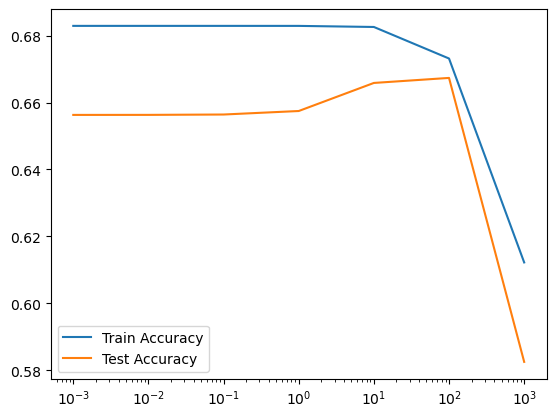

In [21]:
from matplotlib import pyplot as plt

plt.plot(alpha_values, train_acc, label='Train Accuracy')
plt.plot(alpha_values, test_acc, label='Test Accuracy')

plt.legend()
plt.xscale('log')

In [22]:
ridge_ppl = Pipeline([
        ('fs', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('ridge_reg', Ridge(alpha= 100))
    ])
    
ridge_ppl.fit(X_train, y_train)
ridge_ppl.score(X_train, y_train), ridge_ppl.score(X_test, y_test)

(0.6731557498332299, 0.6673572223889983)

## 2. Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

In [28]:
train_acc = []
test_acc = []

for av in alpha_values:
    lasso_ppl = Pipeline([
        ('fs', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('lasso_reg', Lasso(alpha= av, max_iter=50000))
    ])
    
    lasso_ppl.fit(X_train, y_train)
    train_acc.append(lasso_ppl.score(X_train, y_train))
    test_acc.append(lasso_ppl.score(X_test, y_test))

C:\Users\MuhammadWasim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.467e+00, tolerance: 2.066e+00
  model = cd_fast.enet_coordinate_descent(


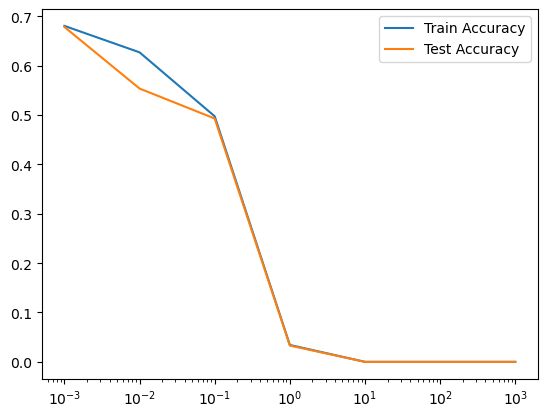

In [29]:
from matplotlib import pyplot as plt

plt.plot(alpha_values, train_acc, label='Train Accuracy')
plt.plot(alpha_values, test_acc, label='Test Accuracy')

plt.legend()
plt.xscale('log')

In [31]:
lasso_ppl = Pipeline([
        ('fs', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('lasso_reg', Lasso(alpha= 0.001, max_iter=50000))
    ])
    
lasso_ppl.fit(X_train, y_train)

lasso_ppl.score(X_train, y_train), lasso_ppl.score(X_test, y_test)

C:\Users\MuhammadWasim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.467e+00, tolerance: 2.066e+00
  model = cd_fast.enet_coordinate_descent(


(0.6806306925586114, 0.6784351047363308)

In [32]:
np.sum(lasso_ppl['lasso_reg'].coef_ != 0)

42

In [33]:
np.sum(lasso_ppl['lasso_reg'].coef_ == 0)

3